In [51]:
# general tools
import os
import sys
import time
import h5py
import random
from glob import glob

import numpy as np
from random import shuffle

In [2]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import classification_report, auc, roc_curve
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression

### Training set

In [2]:
# filename_train = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*neg_neg_neg*lead2.npy")) + \
#                  sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*pos*lead2.npy")) + \
#                  sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*neg_neg_neg*lead3.npy")) + \
#                  sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*pos*lead3.npy")) + \
#                  sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*neg_neg_neg*lead4.npy")) + \
#                  sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/TRAIN*pos*lead4.npy")) + \

In [7]:
# data_lead1_p0 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead1_part0_vec2.npy', allow_pickle=True)[()]
# data_lead1_p1 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead1_part1_vec2.npy', allow_pickle=True)[()]
# data_lead1_p2 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead1_part2_vec2.npy', allow_pickle=True)[()]

data_lead2_p0 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead2_part0_vec2.npy', allow_pickle=True)[()]
data_lead2_p1 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead2_part1_vec2.npy', allow_pickle=True)[()]
data_lead2_p2 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead2_part2_vec2.npy', allow_pickle=True)[()]

data_lead3_p0 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead3_part0_vec2.npy', allow_pickle=True)[()]
data_lead3_p1 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead3_part1_vec2.npy', allow_pickle=True)[()]
data_lead3_p2 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead3_part2_vec2.npy', allow_pickle=True)[()]

data_lead4_p0 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead4_part0_vec2.npy', allow_pickle=True)[()]
data_lead4_p1 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead4_part1_vec2.npy', allow_pickle=True)[()]
data_lead4_p2 = np.load('/glade/work/ksha/NCAR/TRAIN_pred_lead4_part2_vec2.npy', allow_pickle=True)[()]

In [8]:
TRAIN_256 = np.concatenate((data_lead2_p0['y_vector'], 
                            data_lead2_p1['y_vector'], 
                            data_lead2_p2['y_vector'],
                            data_lead3_p0['y_vector'], 
                            data_lead3_p1['y_vector'], 
                            data_lead3_p2['y_vector'],
                            data_lead4_p0['y_vector'], 
                            data_lead4_p1['y_vector'], 
                            data_lead4_p2['y_vector'],), axis=0)


TRAIN_pred = np.concatenate((data_lead2_p0['y_pred'], 
                             data_lead2_p1['y_pred'], 
                             data_lead2_p2['y_pred'],
                             data_lead3_p0['y_pred'], 
                             data_lead3_p1['y_pred'], 
                             data_lead3_p2['y_pred'],
                             data_lead4_p0['y_pred'], 
                             data_lead4_p1['y_pred'], 
                             data_lead4_p2['y_pred'],), axis=0)

TRAIN_Y = np.concatenate((data_lead2_p0['y_true'], 
                          data_lead2_p1['y_true'], 
                          data_lead2_p2['y_true'],
                          data_lead3_p0['y_true'], 
                          data_lead3_p1['y_true'], 
                          data_lead3_p2['y_true'],
                          data_lead4_p0['y_true'], 
                          data_lead4_p1['y_true'], 
                          data_lead4_p2['y_true'],), axis=0)

In [9]:
#TRAIN_256 = np.concatenate((TRAIN_256, TRAIN_pred), axis=1)

In [10]:
data_lead4_p0['y_vector'].shape

(200000, 768)

### Validation set

In [11]:
filename_valid = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/VALID*neg_neg_neg*lead2.npy")) + \
                sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/VALID*pos*lead2.npy"))

data_p_valid = np.load('/glade/work/ksha/NCAR/TEST_pred_lead2_vec2.npy', allow_pickle=True)[()]

In [12]:
filename_test = filename_valid + sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_v4/*neg_neg_neg*lead{}.npy".format(2))) + \
                sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_v4/*pos*lead{}.npy".format(2)))

data_p_test = np.load('/glade/work/ksha/NCAR/TEST_pred_lead2_v4_vec2.npy', allow_pickle=True)[()]

In [13]:
TEST_256 = np.concatenate((data_p_valid['y_vector'], data_p_test['y_vector']), axis=0)
TEST_pred = np.concatenate((data_p_valid['y_pred'], data_p_test['y_pred']), axis=0)
TEST_Y = np.concatenate((data_p_valid['y_true'], data_p_test['y_true']), axis=0)

In [14]:
#TEST_256 = np.concatenate((TEST_256, TEST_pred), axis=1)

In [15]:
with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
    lon_80km = h5io['lon_80km'][...]
    lat_80km = h5io['lat_80km'][...]
    land_mask_80km = h5io['land_mask_80km'][...]

In [16]:
#filename_train[0]

In [58]:
ix = 20 #30
iy = 50
# land_mask_ = np.copy(land_mask_80km).astype(np.float)
# land_mask_[ix, iy] = 10
# plt.pcolormesh(land_mask_)

In [59]:
name_self = ['indx{}_indy{}'.format(ix, iy),]

name_block3 = ['indx{}_indy{}'.format(ix-1, iy-1),
               'indx{}_indy{}'.format(ix-1, iy),
               'indx{}_indy{}'.format(ix-1, iy+1),
               'indx{}_indy{}'.format(ix, iy-1),
               'indx{}_indy{}'.format(ix, iy),
               'indx{}_indy{}'.format(ix, iy+1),
               'indx{}_indy{}'.format(ix+1, iy-1),
               'indx{}_indy{}'.format(ix+1, iy),
               'indx{}_indy{}'.format(ix+1, iy+1)]


name_block5 = []

for i in range(ix-2, ix+3):
    for j in range(iy-2, iy+3):
        name_block5.append('indx{}_indy{}'.format(i, j))

In [60]:
len(TRAIN_Y)

1844232

In [61]:
# L_train = len(filename_train)
# flag_pick_train = [False,]*L_train
# filename_pick_train = []

# for i, name in enumerate(filename_train):
#     for patterns in name_block5:
#         if patterns in name:
#             flag_pick_train[i] = True
#             filename_pick_train.append(name)
#             break;

L_test = len(filename_test)
flag_pick_test = [False,]*L_test
filename_pick_test = []

for i, name in enumerate(filename_test):
    for patterns in name_block5:
        if patterns in name:
            flag_pick_test[i] = True
            filename_pick_test.append(name)
            break;

In [62]:
# len(filename_pick_train)

In [63]:
TRAIN_256_pick = TRAIN_256#[flag_pick_train, :]
TRAIN_pred_pick = TRAIN_pred#[flag_pick_train, :]
TRAIN_Y_pick = TRAIN_Y#[flag_pick_train]

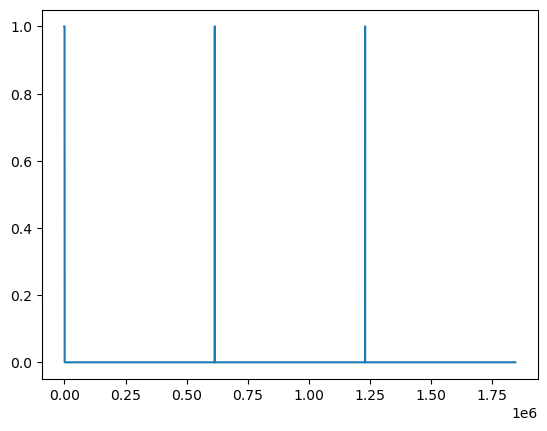

In [64]:
plt.plot(TRAIN_Y_pick)

In [65]:
TRAIN_256_pos = TRAIN_256[TRAIN_Y==1]
TRAIN_256_neg = TRAIN_256[TRAIN_Y==0]

# TRAIN_Y_pos = TRAIN_Y_pick[TRAIN_Y_pick==1]
# TRAIN_Y_neg = TRAIN_Y_pick[TRAIN_Y_pick==0]

In [66]:
def pos_mixer(TRAIN, L, a0=0, a1=0.2):
    data_shape = TRAIN.shape
    out = np.empty((L, data_shape[-1]))
    
    for i in range(L):
        inds = np.random.choice(data_shape[0], 2)
        a = np.random.uniform(a0, a1)
        out[i, :] = a*TRAIN[inds[0], :] + (1-a)*TRAIN[inds[1], :]
    return out


def neg_mixer(TRAIN, L, a0=0, a1=0.2):
    data_shape = TRAIN.shape
    out = np.empty((L, data_shape[-1]))
    
    for i in range(L):
        inds = np.random.choice(data_shape[0], 2)
        a = np.random.uniform(a0, a1)
        out[i, :] = a*TRAIN[inds[0], :] + (1-a)*TRAIN[inds[1], :]
    return out

In [67]:
TEST_256_pick = TEST_256[flag_pick_test, :]
TEST_pred_pick = TEST_pred[flag_pick_test, :]
TEST_Y_pick = TEST_Y[flag_pick_test]

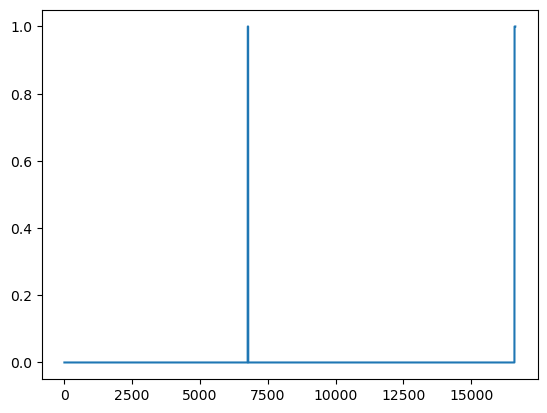

In [68]:
plt.plot(TEST_Y_pick)

In [69]:
# plt.plot(pos_mixer(TRAIN_256_pos, 1, a0=0, a1=0.2).T);
# plt.plot(TRAIN_256_neg[0, :].T);

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras_unet_collection import utils as k_utils

In [71]:
from tensorflow.keras import backend

In [72]:
def create_model():

    IN = keras.Input((768,))

    X = IN

    X = keras.layers.Dense(1024, activity_regularizer=keras.regularizers.L2(1e-2))(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Activation("gelu")(X)

    X = keras.layers.Dropout(0.3)(X)
    #X = keras.layers.GaussianDropout(0.1)(X)

    X = keras.layers.Dense(512, activity_regularizer=keras.regularizers.L2(1e-2))(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Activation("gelu")(X)

    X = keras.layers.Dropout(0.3)(X)
    #X = keras.layers.GaussianDropout(0.1)(X)

    X = keras.layers.Dense(128, activity_regularizer=keras.regularizers.L2(1e-2))(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Activation("gelu")(X)

    X = keras.layers.Dropout(0.3)(X)

    X = keras.layers.Dense(64, activity_regularizer=keras.regularizers.L2(1e-2))(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Activation("gelu")(X)

    OUT = X
    OUT = keras.layers.Dense(1, activation='sigmoid', bias_initializer=keras.initializers.Constant(-10))(OUT)

    model = keras.models.Model(inputs=IN, outputs=OUT)
    
    return model

In [73]:
model = create_model()

model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(lr=1e-5))
#

In [74]:
batch_dir = '/glade/scratch/ksha/DATA/NCAR_batch/'
temp_dir = '/glade/work/ksha/NCAR/Keras_models/'

key = 'HEAD_Lead2'

model_name = '{}_ix{}_iy{}'.format(key, ix, iy)
model_path = temp_dir+model_name

# W_old = k_utils.dummy_loader(temp_dir+'HEAD_Lead2_ix{}_iy{}_tune'.format(ix, iy))
# model.set_weights(W_old)

In [75]:
Y_pred = model.predict([TEST_256_pick])
Y_pred[Y_pred<0] = 0
Y_pred[Y_pred>1] = 1

In [76]:
ref = np.sum(TEST_Y_pick) / len(TEST_Y_pick)

In [77]:
ref

0.0029473684210526317

In [78]:
def verif_metric(VALID_target, Y_pred, ref):


    # fpr, tpr, thresholds = roc_curve(VALID_target.ravel(), Y_pred.ravel())
    # AUC = auc(fpr, tpr)
    # AUC_metric = 1 - AUC
    
    BS = np.mean((VALID_target.ravel() - Y_pred.ravel())**2)
    #ll = log_loss(VALID_target.ravel(), Y_pred.ravel())
    
    #print('{}'.format(BS))
    metric = BS

    return metric / ref

In [79]:
record = verif_metric(TEST_Y_pick, Y_pred, ref)
print("Initial record: {}".format(record))

Initial record: 0.9999276415007665


In [80]:
tol = 0
min_del = 0
max_tol = 10 # early stopping with patience

epochs = 500
batch_size = 200
L_train = 200 #int(len(TRAIN_Y_pick) / batch_size)


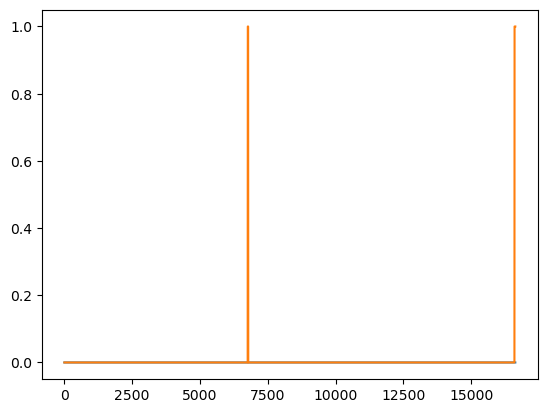

In [81]:
plt.plot(Y_pred)
plt.plot(TEST_Y_pick)

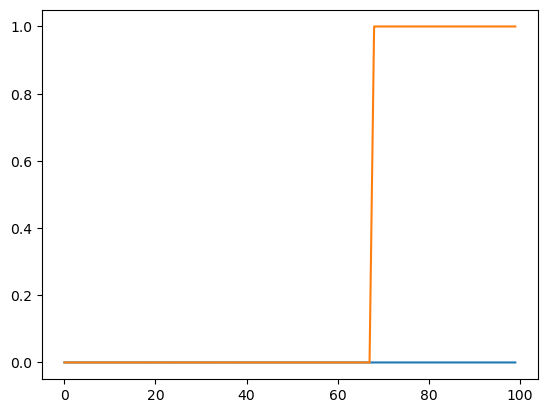

In [82]:
plt.plot(Y_pred[-100:])
plt.plot(TEST_Y_pick[-100:])

In [83]:
# callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0, patience=7),
#              keras.callbacks.ModelCheckpoint(filepath=save_dir+'calib_model', 
#                                              monitor='val_loss', save_best_only=True)]

# calib_model.fit(x=y_train_pred, y=y_train_true, batch_size=32, epochs=100, verbose=1,
#                 callbacks=callbacks, validation_data=(y_pred, y_true), shuffle=True)

In [84]:
# target_lr = 1e-4
# total_steps = epochs
# warmup_steps = int(0.05*total_steps)
# hold = warmup_steps
# global_step = np.arange(epochs)

# learning_rate = 0.5 * target_lr * (1 + np.cos(np.pi * (global_step - warmup_steps - hold) / float(total_steps - warmup_steps - hold)))
# warmup_lr = target_lr * (global_step / warmup_steps)

In [85]:
len(TRAIN_256_pos)

1562

In [86]:
training_rounds = 10
seeds = [12342, 2536234, 98765, 473, 865, 7456, 69472, 3456357, 3425, 678]

In [87]:
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [ ]:
# ========== Training loop ========== #
L_pos = len(TRAIN_256_pos)
L_neg = len(TRAIN_256_neg)

record = 1.1
print("Initial record: {}".format(record))


min_del = 0
max_tol = 10 # early stopping with patience

epochs = 500
batch_size = 200
L_train = 200 #int(len(TRAIN_Y_pick) / batch_size)

for r in range(training_rounds):
    if r == 0:
        tol = 0
    else:
        tol = -200
        
    model = create_model()

    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False),
                  optimizer=keras.optimizers.Adam(lr=1e-5))
    
    set_seeds(seeds[r])
    print('Training round {}'.format(r))
    
    for i in range(epochs):

        #backend.set_value(model.optimizer.learning_rate, learning_rate[i])

        #print('epoch = {}'.format(i))
        start_time = time.time()

        # loop of batch
        for j in range(L_train):

            #N_aug = int(np.random.uniform(2, 7))
            #N_pos = int(np.random.uniform(30, 50))
            N_pos = 100
            #N_aug = int(np.random.uniform(20, 45))

            N_neg = batch_size - N_pos

            ind_neg = du.shuffle_ind(L_neg)
            ind_pos = du.shuffle_ind(L_pos)

            ind_neg_pick = ind_neg[:N_neg]
            ind_pos_pick = ind_pos[:N_pos]

            X_batch_neg = TRAIN_256_neg[ind_neg_pick, :] #
            X_batch_pos = pos_mixer(TRAIN_256_pos, N_pos, a0=0, a1=0.05) #TRAIN_256_pos[ind_pos_pick, :] # 

            # np.random.shuffle(TRAIN_256_neg)
            # np.random.shuffle(TRAIN_256_pos)

            # X_batch_neg = TRAIN_256_neg[:N_neg, :]
            # X_batch_pos = TRAIN_256_pos[:N_pos, :]

            X_batch = np.concatenate((X_batch_neg, X_batch_pos), axis=0)

            # Y_batch = np.concatenate((np.random.uniform(0.0, 0.01, size=N_neg), 
            #                           np.random.uniform(0.6, 0.99, size=N_pos)), axis=0)

            Y_batch = np.ones([batch_size,])
            Y_batch[:N_neg] = 0.0

            ind_ = du.shuffle_ind(batch_size)

            X_batch = X_batch[ind_, :]
            Y_batch = Y_batch[ind_]

            # train on batch
            model.train_on_batch(X_batch, Y_batch);

        # epoch end operations
        Y_pred = model.predict([TEST_256_pick])

        Y_pred[Y_pred<0] = 0
        Y_pred[Y_pred>1] = 1

        record_temp = verif_metric(TEST_Y_pick, Y_pred, ref)

        # if i % 10 == 0:
        #     model.save(model_path_backup)

        if (record - record_temp > min_del):
            print('Validation loss improved from {} to {}'.format(record, record_temp))
            record = record_temp
            tol = 0
            #print('tol: {}'.format(tol))
            # save
            print('save to: {}'.format(model_path))
            model.save(model_path)
        else:
            print('Validation loss {} NOT improved'.format(record_temp))
            if record_temp > 1.0:
                print('Early stopping')
                break;
            else:
                tol += 1
                if tol >= max_tol:
                    print('Early stopping')
                    break;
                else:
                    continue;
        print("--- %s seconds ---" % (time.time() - start_time))

Initial record: 1.1
Training round 0
Validation loss improved from 1.1 to 0.99967876802209
save to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50
INFO:tensorflow:Assets written to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50/assets
--- 18.31756019592285 seconds ---
Validation loss improved from 0.99967876802209 to 0.9992185353655642
save to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50
INFO:tensorflow:Assets written to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50/assets
--- 11.354659795761108 seconds ---
Validation loss improved from 0.9992185353655642 to 0.9987796005557773
save to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50
INFO:tensorflow:Assets written to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50/assets
--- 11.427933692932129 seconds ---
Validation loss improved from 0.9987796005557773 to 0.9984249036508221
save to: /glade/work/ksha/NCAR/Keras_models/HEAD_Lead2_ix20_iy50
INFO:tensorflow:Assets written to: /glad

In [55]:
tol

12

In [ ]:
+

In [58]:
np.random.shuffle(TRAIN_256_neg).shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
L_pos

In [ ]:
# from tensorflow import keras
#from keras_unet_collection import utils as k_utils

# IN = keras.Input((1,))

# X = IN
# X = keras.layers.Dense(64)(X)
# X = keras.layers.BatchNormalization()(X)
# X = keras.layers.Activation("gelu")(X)

# X = keras.layers.Dense(128)(X)
# X = keras.layers.BatchNormalization()(X)
# X = keras.layers.Activation("gelu")(X)

# X = keras.layers.Dense(64)(X)
# X = keras.layers.BatchNormalization()(X)
# X = keras.layers.Activation("gelu")(X)

# OUT = X
# OUT = keras.layers.Dense(1, activation='sigmoid')(OUT)

# calib_model = keras.models.Model(inputs=IN, outputs=OUT)

# calib_model.compile(loss=keras.losses.mean_squared_error, 
#                     optimizer=keras.optimizers.SGD(lr=1e-5),
#                     metrics=keras.losses.mean_squared_error)

# W = k_utils.dummy_loader('/glade/work/ksha/NCAR/Keras_models/calib_model/')
# calib_model.set_weights(W)

# y_pred_nn = calib_model.predict(y_pred)
# y_train_pred_nn = calib_model.predict(y_train_pred)

# callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0, patience=7),
#              keras.callbacks.ModelCheckpoint(filepath=save_dir+'calib_model', 
#                                              monitor='val_loss', save_best_only=True)]

# calib_model.fit(x=y_train_pred, y=y_train_true, batch_size=32, epochs=100, verbose=1,
#                 callbacks=callbacks, validation_data=(y_pred, y_true), shuffle=True)

In [ ]:
print(classification_report(PRED_Y, TEST_Y))

In [ ]:
y_true = TEST_Y
y_pred = PRED_Y

fpr, tpr, thres = roc_curve(y_true, y_pred)
o_bar = np.mean(y_true)

bs = brier_score_loss(y_true, y_pred)
auc_score = auc(fpr, tpr)
bss = (o_bar-bs)/(o_bar)

print('auc: {}'.format(auc_score))
print('o_bar: {}'.format(o_bar))
print('bs: {}'.format(bs))
print('bss: {}'.format(bss))

In [12]:
# classifiers = [
#     KNeighborsClassifier(2),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
# ]

In [13]:
# # for i, clf in enumerate(classifiers):
# #     clf.fit(TRAIN_256, TRAIN_Y)
# #     score_ = clf.score(TEST_256, TEST_Y)

# clf = classifiers[7]

In [14]:
# clf.fit(TRAIN_256, TRAIN_Y)

In [15]:
# PRED_Y = clf.predict(TEST_256)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    278526
         1.0       0.03      0.23      0.06        62

    accuracy                           1.00    278588
   macro avg       0.52      0.61      0.53    278588
weighted avg       1.00      1.00      1.00    278588



auc: 0.5160056705746704
o_bar: 0.0015614455755452495
bs: 0.00168348959754189
bss: -0.07816091954023
